In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from imblearn.over_sampling import RandomOverSampler
import seaborn as sns
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.utils.validation import check_is_fitted
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
# fill the null values SimpleImputer
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.ensemble import GradientBoostingClassifier
!pip install category_encoders
from category_encoders import OneHotEncoder
from category_encoders import OrdinalEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
!pip install teaching_tools
import teaching_tools
from teaching_tools.widgets import ConfusionMatrixWidget



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 251.0/251.0 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 798.7/798.7 kB 19.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 789.1/789.1 kB 42.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 648.9/648.9 kB 36.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 43.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 283.7/283.7 kB 10.7 MB/s eta 0:00:00
  Created wheel for names: filename=names-0.3.0-py3-none-any.whl size=803682 sha256=f7a436b31d4f4c595bd983745bae3e1fc9f4289bb431999903084b90d527dd0c
  Stored in directory: /root/.cache/pip/wheels/fc/9a/6f/78f4282bbcaa2d8c678b73c54c0bb1b7a04009f0d7cec79fce
  Created wheel for sklearn: filename=sklearn-0.0.post5-py3-none-any.whl size=2950 sha256=a711f9da

In [ ]:
df=pd.read_csv("/content/framingham.csv")
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [ ]:
x=df.drop(columns=["TenYearCHD"])
y=df.TenYearCHD

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
x_traine,x_val,y_traine,y_val=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
model=make_pipeline(
    SimpleImputer(),
    OrdinalEncoder(),

    DecisionTreeClassifier(random_state=42)
)
model.fit(x_train,y_train)

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('ordinalencoder', OrdinalEncoder(cols=[], mapping=[])),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(random_state=42))])

In [ ]:
model.score(x_train,y_train)

1.0

In [ ]:
model.score(x_val,y_val)

0.7606132075471698

In [ ]:
tree_depth=model.named_steps["decisiontreeclassifier"].get_depth()
print("Tree Depth:" ,tree_depth)

Tree Depth: 26


In [ ]:
depth_hyperparamas=list(range(1,26,2))
depth_hyperparamas

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25]

In [ ]:
training_acc=[]
validation_acc=[]
for d in depth_hyperparamas:
  test_model=make_pipeline(
      SimpleImputer(),
      OrdinalEncoder(),
      DecisionTreeClassifier(max_depth=d ,random_state=42)
      )
  test_model.fit(x_train,y_train)
  training_acc.append(test_model.score(x_train,y_train))
  validation_acc.append(test_model.score(x_val,y_val))
  print("Training Accuracy Score:",training_acc)
  print("Validation Accuracy Score:",validation_acc)


Training Accuracy Score: [0.8466076696165191]
Validation Accuracy Score: [0.8537735849056604]
Training Accuracy Score: [0.8466076696165191, 0.8489675516224189]
Validation Accuracy Score: [0.8537735849056604, 0.8466981132075472]
Training Accuracy Score: [0.8466076696165191, 0.8489675516224189, 0.8631268436578171]
Validation Accuracy Score: [0.8537735849056604, 0.8466981132075472, 0.8466981132075472]
Training Accuracy Score: [0.8466076696165191, 0.8489675516224189, 0.8631268436578171, 0.876401179941003]
Validation Accuracy Score: [0.8537735849056604, 0.8466981132075472, 0.8466981132075472, 0.847877358490566]
Training Accuracy Score: [0.8466076696165191, 0.8489675516224189, 0.8631268436578171, 0.876401179941003, 0.8997050147492626]
Validation Accuracy Score: [0.8537735849056604, 0.8466981132075472, 0.8466981132075472, 0.847877358490566, 0.8195754716981132]
Training Accuracy Score: [0.8466076696165191, 0.8489675516224189, 0.8631268436578171, 0.876401179941003, 0.8997050147492626, 0.9159292

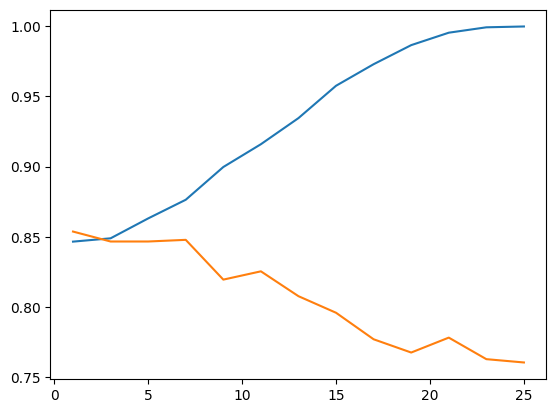

In [ ]:
plt.plot(depth_hyperparamas,training_acc,label="training")
plt.plot(depth_hyperparamas,validation_acc,label="validation")

In [ ]:
over_sampler=RandomOverSampler(random_state=42)
x_train_over,y_train_over=over_sampler.fit_resample(x_train,y_train)
print(x_train_over.shape)

x_train,x_val,y_train,y_val=train_test_split(x_train_over,y_train_over,test_size=0.2,random_state=42)

(5740, 15)


In [ ]:
clf=make_pipeline(
    SimpleImputer(),
    RandomForestClassifier()
)
print(clf)

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('randomforestclassifier', RandomForestClassifier())])


In [ ]:
cv_acc_scores=cross_val_score(clf,x_train_over,y_train_over,cv=5,n_jobs=-1)
print(cv_acc_scores)

[0.97648084 0.97648084 0.97735192 0.978223   0.97299652]


In [ ]:
params={
    "simpleimputer__strategy":["mean","median"],
    "randomforestclassifier__n_estimators":range(25,100,25),
    "randomforestclassifier__max_depth":range(25,100,25)
}
params

{'simpleimputer__strategy': ['mean', 'median'],
 'randomforestclassifier__n_estimators': range(25, 100, 25),
 'randomforestclassifier__max_depth': range(25, 100, 25)}

In [ ]:
model =  GridSearchCV(
    clf,
    param_grid=params,
    cv=5,
    n_jobs = -1,
    verbose=1
)


In [ ]:
model.fit(x_train_over,y_train_over)


Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('simpleimputer', SimpleImputer()),
                                       ('randomforestclassifier',
                                        RandomForestClassifier())]),
             n_jobs=-1,
             param_grid={'randomforestclassifier__max_depth': range(25, 100, 25),
                         'randomforestclassifier__n_estimators': range(25, 100, 25),
                         'simpleimputer__strategy': ['mean', 'median']},
             verbose=1)

In [ ]:
cv_results=pd.DataFrame(model.cv_results_)
cv_results.head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_randomforestclassifier__max_depth,param_randomforestclassifier__n_estimators,param_simpleimputer__strategy,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.498891,0.030471,0.032192,0.008956,25,25,mean,"{'randomforestclassifier__max_depth': 25, 'ran...",0.964286,0.966028,0.967770,0.962544,0.969512,0.966028,0.002464,16
1,0.280546,0.046057,0.014457,0.000787,25,25,median,"{'randomforestclassifier__max_depth': 25, 'ran...",0.965157,0.972997,0.970383,0.967770,0.966028,0.968467,0.002884,14
2,0.569634,0.103873,0.023819,0.001336,25,50,mean,"{'randomforestclassifier__max_depth': 25, 'ran...",0.968641,0.976481,0.976481,0.975610,0.974739,0.974390,0.002946,6
3,0.493577,0.010588,0.022938,0.000803,25,50,median,"{'randomforestclassifier__max_depth': 25, 'ran...",0.975610,0.973868,0.976481,0.973868,0.975610,0.975087,0.001045,4
4,0.718729,0.010416,0.035036,0.006443,25,75,mean,"{'randomforestclassifier__max_depth': 25, 'ran...",0.973868,0.972125,0.975610,0.972125,0.969512,0.972648,0.002032,10
5,0.795239,0.075615,0.041309,0.013964,25,75,median,"{'randomforestclassifier__max_depth': 25, 'ran...",0.967770,0.971254,0.975610,0.972997,0.969512,0.971429,0.002721,12
6,0.245033,0.003160,0.013706,0.000531,50,25,mean,"{'randomforestclassifier__max_depth': 50, 'ran...",0.963415,0.972125,0.967770,0.972997,0.966899,0.968641,0.003528,13
7,0.253687,0.007970,0.013825,0.000447,50,25,median,"{'randomforestclassifier__max_depth': 50, 'ran...",0.965157,0.965157,0.966028,0.967770,0.962544,0.965331,0.001689,17
8,0.620570,0.163652,0.031836,0.011126,50,50,mean,"{'randomforestclassifier__max_depth': 50, 'ran...",0.972125,0.972997,0.976481,0.972997,0.967770,0.972474,0.002787,11
9,0.986954,0.041362,0.044507,0.007572,50,50,median,"{'randomforestclassifier__max_depth': 50, 'ran...",0.974739,0.980836,0.978223,0.978223,0.968641,0.976132,0.004217,2


In [ ]:
acc_train = model.score(x_train_over,y_train_over)
acc_test = model.score(x_test,y_test)

print("Training Accuracy:", round(acc_train, 4))
print("Test Accuracy:", round(acc_test, 4))

Training Accuracy: 1.0
Test Accuracy: 0.8408


In [ ]:
model.best_estimator_

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('randomforestclassifier',
                 RandomForestClassifier(max_depth=75, n_estimators=50))])

In [ ]:
clfgf = make_pipeline(

    SimpleImputer(),
    GradientBoostingClassifier()
)

In [ ]:
paramsg = {
    "simpleimputer__strategy": ["mean","median"],
    "gradientboostingclassifier__n_estimators": range(25,100,25),
    "gradientboostingclassifier__max_depth": range(25,100,25)



}

paramsg

{'simpleimputer__strategy': ['mean', 'median'],
 'gradientboostingclassifier__n_estimators': range(25, 100, 25),
 'gradientboostingclassifier__max_depth': range(25, 100, 25)}

In [ ]:
modelgf =  GridSearchCV(
    clfgf,
    param_grid=paramsg,
    cv=5,
    n_jobs = -1,
    verbose=1
)

In [ ]:
modelgf.fit(x_train_over,y_train_over)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('simpleimputer', SimpleImputer()),
                                       ('gradientboostingclassifier',
                                        GradientBoostingClassifier())]),
             n_jobs=-1,
             param_grid={'gradientboostingclassifier__max_depth': range(25, 100, 25),
                         'gradientboostingclassifier__n_estimators': range(25, 100, 25),
                         'simpleimputer__strategy': ['mean', 'median']},
             verbose=1)

In [ ]:
results = pd.DataFrame(modelgf.cv_results_)
results.sort_values("rank_test_score").head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_gradientboostingclassifier__max_depth,param_gradientboostingclassifier__n_estimators,param_simpleimputer__strategy,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
5,5.468398,0.774481,0.019350,0.004990,25,75,median,"{'gradientboostingclassifier__max_depth': 25, ...",0.912021,0.913763,0.933798,0.916376,0.927700,0.920732,0.008517,1
17,5.215803,0.740460,0.018604,0.007492,75,75,median,"{'gradientboostingclassifier__max_depth': 75, ...",0.912892,0.914634,0.932056,0.913763,0.927700,0.920209,0.008033,2
14,3.772363,0.740188,0.015342,0.006424,75,50,mean,"{'gradientboostingclassifier__max_depth': 75, ...",0.908537,0.916376,0.932927,0.918118,0.925087,0.920209,0.008256,2
0,3.978917,0.447946,0.024577,0.013393,25,25,mean,"{'gradientboostingclassifier__max_depth': 25, ...",0.908537,0.919861,0.932056,0.915505,0.923345,0.919861,0.007849,4
11,5.109485,0.749144,0.016349,0.000325,50,75,median,"{'gradientboostingclassifier__max_depth': 50, ...",0.912892,0.912021,0.931185,0.912892,0.930314,0.919861,0.008900,5
7,1.546184,0.027853,0.008688,0.000346,50,25,median,"{'gradientboostingclassifier__max_depth': 50, ...",0.906794,0.918118,0.931185,0.916376,0.925958,0.919686,0.008380,6
13,2.040017,0.561708,0.008825,0.000206,75,25,median,"{'gradientboostingclassifier__max_depth': 75, ...",0.912892,0.913763,0.929443,0.912021,0.930314,0.919686,0.008344,6
15,3.075787,0.014271,0.012899,0.001182,75,50,median,"{'gradientboostingclassifier__max_depth': 75, ...",0.914634,0.911150,0.933798,0.915505,0.923345,0.919686,0.008104,6
3,3.837204,0.886126,0.014182,0.004377,25,50,median,"{'gradientboostingclassifier__max_depth': 25, ...",0.913763,0.913763,0.930314,0.914634,0.925958,0.919686,0.007042,6
4,4.945751,0.773897,0.016180,0.000441,25,75,mean,"{'gradientboostingclassifier__max_depth': 25, ...",0.909408,0.915505,0.934669,0.912021,0.925087,0.919338,0.009327,10


In [ ]:
acc_train = modelgf.score(x_train_over,y_train_over)
acc_test = modelgf.score(x_test,y_test)

print("Training Accuracy:", round(acc_train, 4))
print("Test Accuracy:", round(acc_test, 4))

Training Accuracy: 1.0
Test Accuracy: 0.7476


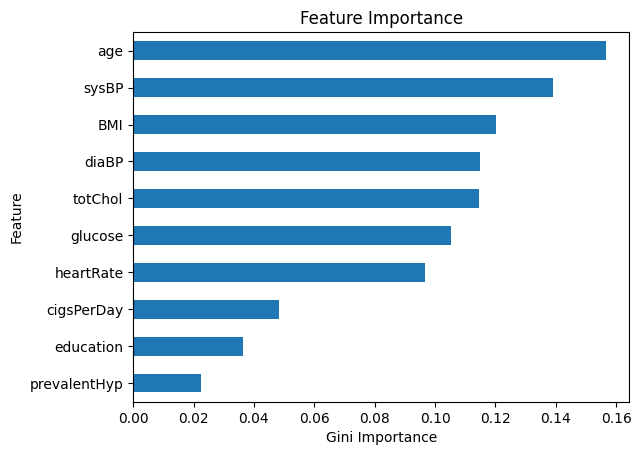

In [ ]:
# Get feature names from training data
features = x_train_over.columns
# Extract importances from model
importances = model.best_estimator_.named_steps["randomforestclassifier"].feature_importances_
# Create a series with feature names and importances
feat_imp = pd.Series(importances, index = features).sort_values()
# Plot 10 most important features

feat_imp.tail(10).plot(kind="barh")
plt.xlabel("Gini Importance")
plt.ylabel("Feature")
plt.title("Feature Importance");

In [ ]:
c = ConfusionMatrixWidget(model, x_test, y_test)
c.show()

FloatSlider(value=0.5, continuous_update=False, description='Threshold:', max=1.0)